# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [59]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz
#NOT INSTALLED ON COMPUTER
#I DON'T NEED IT FOR THE CODE CHALLENGE
#I INSERTED THE SCREENSHOTS FOR QUESTION 14
#import graphviz 

# LEARN HOW TO INSTALL `GRAPHVIZ` BUT IT'S NOT NECESSARY

In [60]:
#!pip install graphviz

In [61]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [62]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [63]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


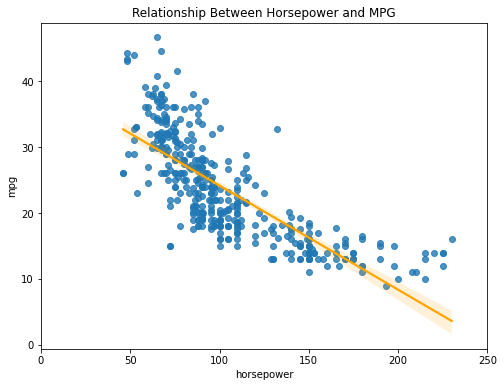

In [64]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [65]:
# call_on_students(1)

#### Answer: 

- Minimum point around -0.158
- This tells us that a slope = -0.158 is the best slope for the line of best fit
- RSS is our error term  which we want to minimize


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [66]:
# call_on_students(1)

#### Answer: 

*I can't annotate on the picture since I can only annotate in zoom chat*
- Derivative

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [67]:
# call_on_students(1)

#### Answer: 

- Step size is the amount the algortithm moves its guess to try to find the best parameter
- Learning rate moderates that step size, and is a hyperparameter we set!
- Larger learning rate = larger steps and vice versa, which has consequences


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [68]:
# call_on_students(1)

#### Answer: 

- (often) Binary or Categorical target
- Logistic regression outputs the log odds, which can be converted to the probabilities of the target. It doesn't just give us 0's and 1's; It gives values between 0 and 1 which we can access in sklearn with `predict_proba()`
- Linear regression used for continuous targets while Logistic used for classification/categorial targets
- Logistic regression is a parametric model because we are finding the parameters/coefficients


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [69]:
# call_on_students(1)

#### Answer: 

- Benefit of Logistic Regression:
    - Can be fast computationally
    - Simple to interpret (parameters you can interpret)
    - Not prone to overfitting
- Benefit of Decision Trees:
    - Faster to start from a coding perspective (i.e. needs less processing)
    - Can be better at dealing with imbalanced targets
    - Can handle nonlinearities much more effortlessly (with logistic regression, we need to account for interactions more directly)

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [70]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [71]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

Inputs will be all of the columns besides `target`, and we are trying to predict `target`.

1. Perform a train/test split
2. Scale the inputs


In [72]:
# call_on_students(1)

In [73]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop(columns = 'target')
#can also use .drop('target', axis = 1)
y = mpg_class['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [74]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
#could also use X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [17]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [75]:
# Code to explore
y_train.value_counts()

0    195
1     67
Name: target, dtype: int64

In [76]:
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- 74.4% is 0, 25.5% is 1


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- Always guess our majority class (in this case, 0)


#### Part 3: How accurate would that baseline be on test data?


In [77]:
# Code to find the answer
y_test.value_counts()

0    98
1    32
Name: target, dtype: int64

In [78]:
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- Model-less guess (guessing only 0) would be 75% on test data


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [20]:
# call_on_students(1)

#### Answer:

- We have imbalanced target (aka Data is imbalance)
- Oversample the minority, potentially making synthetic data (like SMOTE)
- You can also adjust class_weight in the model (if that's an option)

Could hypothetically undersample the majority, but this sample isn't very big so that wouldn't be a good strategy in this case.


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [21]:
# call_on_students(1)

In [80]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state = 42)

logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

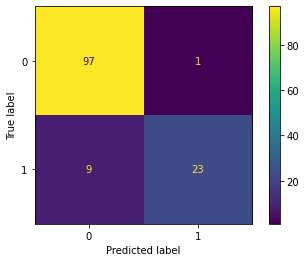

In [83]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test)

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [24]:
# call_on_students(1)

In [84]:
test_preds = logreg.predict(X_test_scaled)
test_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
# Accuracy = (TP + TN)/(TP + TN + FP + FN)
accuracy_score(y_test, test_preds)

0.9230769230769231

In [86]:
# Precision = TP/(TP + FP)
precision_score(y_test, test_preds)

0.9583333333333334

In [87]:
# Recall = TP/(TP + FN)
recall_score(y_test, test_preds)

0.71875

In [88]:
# F1-Score
f1_score(y_test, test_preds)

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [29]:
# call_on_students(1)

In [90]:
# Calculate roc-auc

#Answer is: test_preds_proba = logreg.predict_proba(X_test_scaled)[:,1]
test_preds_proba = logreg.predict_proba(X_test_scaled)
test_preds_proba

array([[9.97117884e-01, 2.88211554e-03],
       [9.95334221e-01, 4.66577929e-03],
       [9.99860889e-01, 1.39110635e-04],
       [9.97699595e-01, 2.30040460e-03],
       [9.99634518e-01, 3.65481656e-04],
       [9.99043618e-01, 9.56382448e-04],
       [2.79904115e-03, 9.97200959e-01],
       [9.99026897e-01, 9.73103080e-04],
       [9.33336333e-01, 6.66636668e-02],
       [9.99464221e-01, 5.35778541e-04],
       [8.93497133e-03, 9.91065029e-01],
       [9.57162834e-01, 4.28371664e-02],
       [1.54609949e-01, 8.45390051e-01],
       [9.98638756e-01, 1.36124411e-03],
       [9.11830111e-01, 8.81698888e-02],
       [9.99686066e-01, 3.13933548e-04],
       [9.39695786e-01, 6.03042137e-02],
       [9.99734687e-01, 2.65313401e-04],
       [9.99421021e-01, 5.78978925e-04],
       [9.99475392e-01, 5.24607746e-04],
       [8.74667951e-01, 1.25332049e-01],
       [9.99923819e-01, 7.61806157e-05],
       [9.99914240e-01, 8.57600530e-05],
       [1.32938166e-01, 8.67061834e-01],
       [9.993896

In [91]:
test_preds_proba = test_preds_proba[:,1]

In [92]:
roc_auc_score(y_test, test_preds_proba)

0.9811862244897959

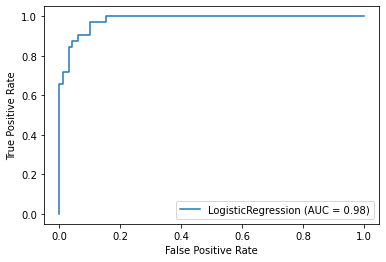

In [93]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [32]:
# call_on_students(1)

#### Answer:

- Model does pretty well. In general, our scores look high, but we don't really have anything to compare it to.
- Recall is lower than precision (this may be a problem depending on the business problem)


## Part 4: Decision Trees

### Set Up

In [33]:
# Helper function from a colleague (h/t Bryan)
def plot_tree(dt, used_cols, out_file='mytree.dot'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

In [34]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [35]:
# Tree based on 1st column

#I WOULD NEED TO INSTALL GRAPHVIZ
#plot_tree(dt_maxdepth1_v1, ['weight'])

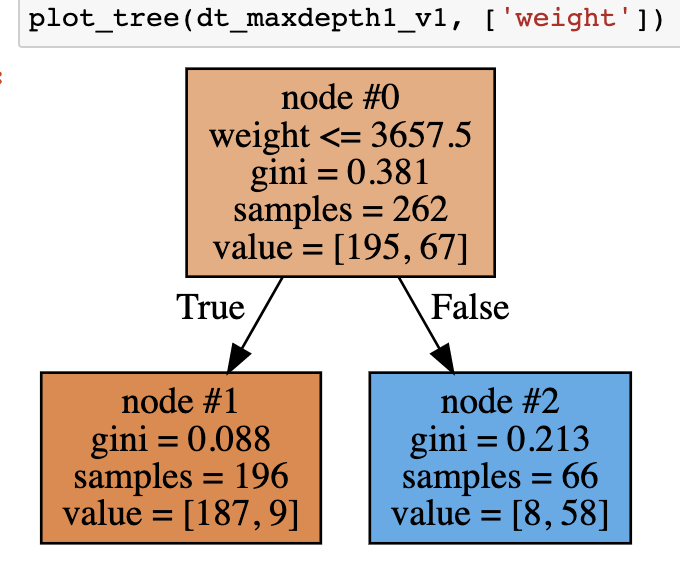

In [36]:
# Tree based on 2nd column

#I WOULD NEED TO INSTALL GRAPHVIZ
#plot_tree(dt_maxdepth1_v2, ['origin'])

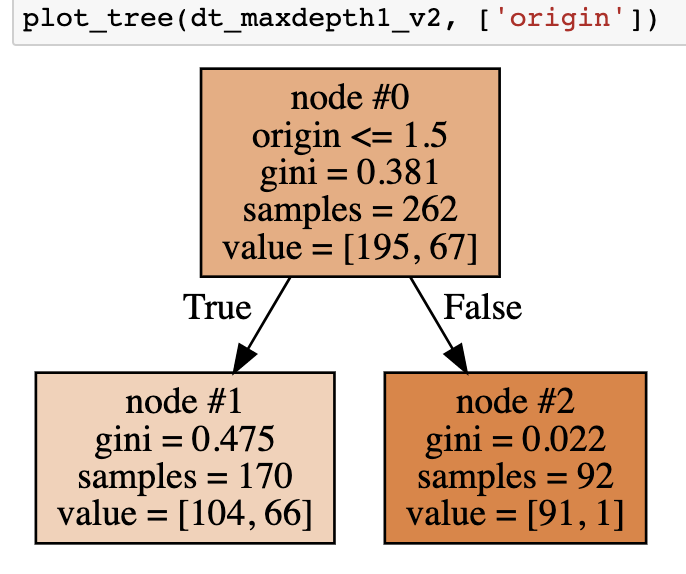

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [37]:
# call_on_students(1)

#### Answer:

- Your gini by default is 0.381
- Entropy and Gini both measures impurity/"mixed up'edness". They are proportional to each other. Close to 1 is bad, meaning high entropy. Gini is faster to calculate which is why it's used.
- First tree is the answer because better split of our targets (i.e. lower Gini)


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [38]:
# call_on_students(1)

In [94]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

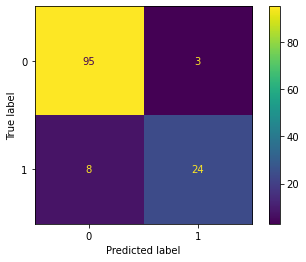

In [95]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test)

### *USE X_TEST, NOT X_TEST_SCALED FOR DT*

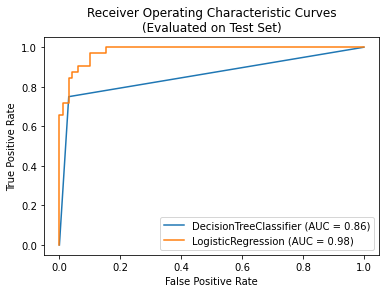

In [96]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Logistic Regression is better becuase 0.98 > 0.86 roc-auc score
- Logistic Regression curve is close to top left corner
